In [11]:
import json
import pandas as pd
import matplotlib.pyplot as plt

path = "../cmake-build-debug/lab4/test_results/ils/"
out_path = "test_results/ils/"

In [12]:
data = pd.read_csv(path + "results.txt", header=None, index_col=0)
data.columns = [ "best cost", "avg time, s"]
data.index.name = "data"

In [13]:
data

,best cost,"avg time, s"
data,,
tai20a,721294,0.17917
tai40a,3249224,4.65746
tai60a,7456016,34.45350
tai80a,13945912,148.28600
tai100a,21682094,420.45300


In [14]:
with open(path + "costs.txt") as inc:
    costs = json.load(inc)

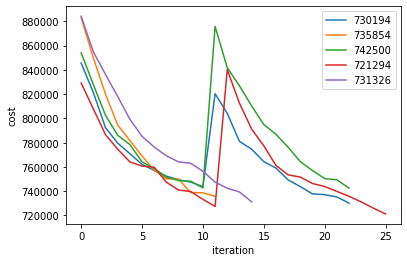

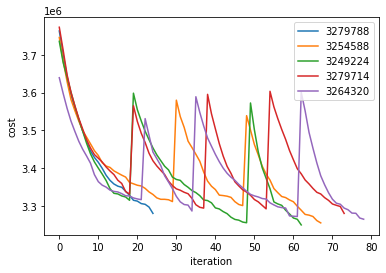

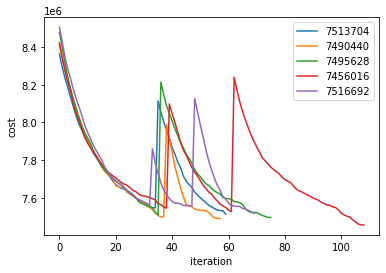

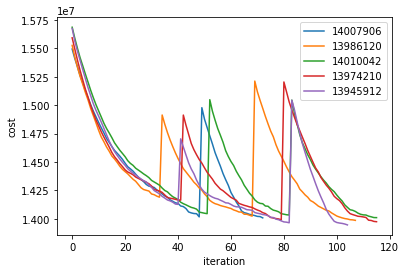

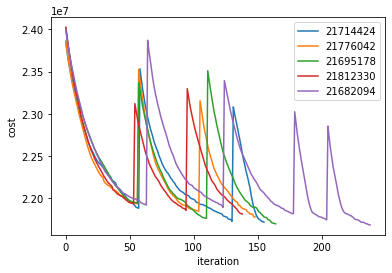

In [15]:
costs_column = []
for i in range(5):
    plt.figure(i)
    for j in costs[i]:
        plt.plot(j, label=j[-1])
    plt.legend()
    plt.xlabel("iteration")
    plt.ylabel("cost")
    draw_path = f"{data.index[i]}.png"
    costs_column.append(draw_path)
    plt.savefig(out_path + draw_path)

In [17]:
pd.concat([pd.Series(costs_column, name="cost dependency", index=data.index), 
           pd.Series(costs_column, name="solution", index=data.index), 
          data], axis=1).to_csv("test_results/ils/output.txt")